<p style='text-align:right;margin-bottom:18.0pt'><b><span style='font-size:10.0pt;font-family:
"Arial",sans-serif'>Source:</span></b><span style='font-size:10.0pt;font-family:
"Arial",sans-serif'> Mary Wootters + Nima Anari + Moses Charikar<b> | Last
update: </b>Caroline Conti + Ana Almeida</span></p>

<header style='background-color:#3498DB;padding:18.0px;text-align:center;font-size:22px;color:white;font-family:"Arial",sans-serif'>
<h2>Iscte – Instituto Universitário de Lisboa </h2>
<h2><span style='font-size:20.0pt'>Desenho e Analise de Algoritmos (2023/2024)</span></h2>
</header>

# Exercício: Multiplicação de inteiros

IPython notebook de apoio para a resolução do exercício de multiplicação de números inteiros.
Execute as células para visualizar os resultados.

## Problema:

Multiplicação de dois inteiros com $n$ dígitos.

## Considerações: 

* Uma vez que estamos a tentar melhorar o algoritmo da multiplicação para números com muitos dígitos, devemos usar o operador de multiplicação $*$ **apenas** para efetuar produtos entre operandos de *um dígito* (vamos considerar que esta função não é muito custosa, como se estes valores já estivessem disponíveis). **Ex.:** $6 * 7$.  
* Podemos usar o operador de adição $+$ para somar números com qualquer quantidade de dígitos (vamos considerar que o custo da operação da adição é desprezível).

In [1]:
# incluir modulos necessários
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from random import choice

## Algumas funções auxiliares

Funções para converter inteiros numa lista de dígitos (e vice-versa)

In [2]:
def getDigits(x):                       # takes an integer x and returns a list of digits, most significant first
    return [ int(a) for a in str(x) ]   # comprehension expression

def makeInt(digits):                 # takes a list of digits (as returned by getDigits) and returns the integer they represent
    return sum( [ 10**(len(digits)-i-1)*digits[i] for i in range(len(digits))])

Função usada para medir o tempo de execução de uma função em lote (*in a bunch*)

In [3]:
# multInABunch: runs a multiplication function a bunch, and times how long it takes.
#
# Input: myFn: a function which takes as input two n-digit integers
#              (Notice that in python you can pass a function as input!)
#        nVals: list of n values to test at
# Output: lists nValues and tValues so that running myFn on a list of length nValues[i] took (on average over numTrials tests) time tValues[i] milliseconds.
#
# Other optional args:
#    - numTrials: for each n tests, do numTrials tests and average them
def multInABunch(myFn, nVals, numTrials=20):
    nValues = []
    tValues = []
    for n in nVals:
        # run myFn several times and average to get a decent idea.
        runtime = 0
        for t in range(numTrials):
            lst1 = [ choice(range(10)) for i in range(n) ] # generate a random list of length n
            lst2 = [ choice(range(10)) for i in range(n) ] # generate another random list of length n
            X = makeInt(lst1)
            Y = makeInt(lst2)
            start = time.time()             # notice that we only start timing just before executing myFn()
            myFn( X, Y )
            end = time.time()               # and we stop the clock as soon as the execution of myFn() stops
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues

## *Baseline* -  Algoritmo da primária

In [4]:
# para cada par de dígitos, adicionar com shifts apropriados; 
# vai simular a operação manual feita no 1.º ciclo
# Input: X e Y são os inteiros
def gradeSchoolMult( X, Y ): # X (multiplicador) e Y (multiplicando)
    x = getDigits(X)
    y = getDigits(Y)
    summands = []
    for iXDigit in range(len(x)):        # para cada posição de dígito em X
        xDigit = x[len(x) - iXDigit - 1] # digito em X
        partialProd = [0 for i in range(iXDigit)]  # guarda o resultado de 'xDigit times y'; inicializa com zeros do shift
        carry = 0 # "e-vai-um" 
        for iYDigit in range(len(y)):        # para cada posição de dígito em Y
            yDigit = y[len(y) - iYDigit - 1] # digito em Y
            newProd = getDigits( xDigit * yDigit + carry )
            partialProd.insert( 0, newProd[-1] ) # colocar o próximo dígito das unidades no produto (à direita no z)
            if len(newProd) > 1:       # "e-vai-um"
                carry = newProd[0]
            else:
                carry = 0
        partialProd.insert(0, carry)    # caso haja "e-vai-um", deve ser colocado como digíto mais à esquerda
        summands.append(makeInt(partialProd)) # acumula todos os resultados parciais
    return sum(summands) # Terminar somando todas as parcelas do produto

### Verificar se o algoritmo está correto:

>**NOTA:** Quando a testar um novo código, vão querer executar testes mais exaustivos! 

In [5]:
X = 1234
Y = 5678
print(gradeSchoolMult(X,Y))
print(X*Y)

7006652
7006652


### Análise empírica do seu tempo de execução:

Verifiquemos **quanto tempo leva a executar** este pedaço de código!  

Fazemos várias repetições guardando os tempos de execução e depois fazemos um gráfico.  

>**NOTA**: Para a construção dos gráficos, falaremos um pouco mais em pormenor da biblioteca Matplotlib na aula prática


In [6]:
# Geração de pontos (abcissas) para avaliação de tempos 
nVals = [2**k for k in range(9)]      # valores x = 2^k, depois vemos porquê...
nVals += [k*10 for k in range(10)]    # mais alguns valores decimais
nVals += [k*50 for k in range(2,11)]  # mais valores mais espaçados...
nVals.sort()                          # ordenação de todas estas abcissas

# executa a função de teste do tempo de execução, para cada n, testa o algoritmo 5 vezes
nValsGS, tValsGS = multInABunch(gradeSchoolMult, nVals, numTrials=5)

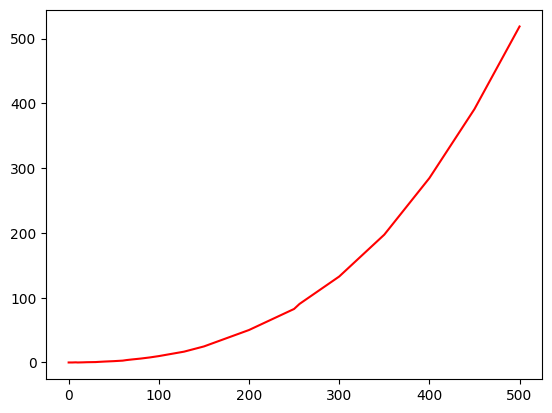

In [7]:
# gráfico  

plt.plot(nValsGS, tValsGS, color="red")



Polinónio ajustado: 0.0026 x^2 + -0.3377 x + 7.9380


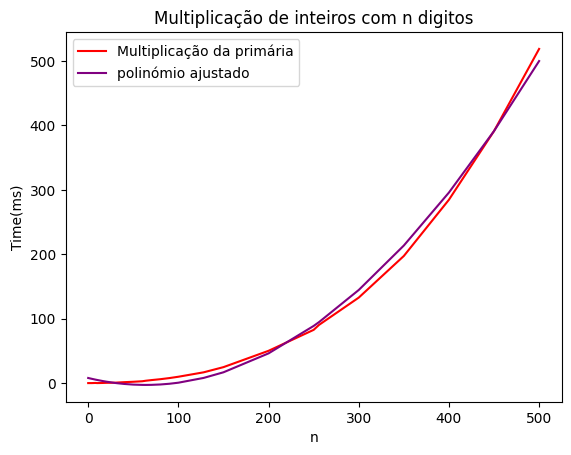

In [8]:
# Para uma visualização melhor e mais completa DEPOIS de vermos o comportamento da multiplicação, 
# vamos verificar se a linha vermelha se ajusta a uma quadrática n^2

plt.plot(nValsGS, tValsGS, color="red", label="Multiplicação da primária")

coeffs = np.polyfit( nValsGS, tValsGS, 2 )   #obter polinómio que melhor se ajusta aos valores do tempo da multiplicação
plt.plot(nValsGS, [ coeffs[2] + coeffs[1]*n + coeffs[0]*n**2 for n in nValsGS], color="purple", label="polinómio ajustado")

plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Multiplicação de inteiros com n digitos")

print(f'Polinónio ajustado: {coeffs[0]:.4f} x^2 + {coeffs[1]:.4f} x + {coeffs[2]:.4f}')

#### Ajusta-se quase perfeitamente!

Vamos verificar o que acontece para uma escala maior de variação de abcissas.

Estamos a comparar 3 algoritmos:
1. Polinómio quadrático ajustado na célula anterior
2. Um algoritmo \"mágico\" de ordem \~$\frac{~n^{1.6}}{10} + 100$
3. Um \"outro algoritmo quadrático\" quadrático com os mesmos coeficientes (para comparação) \~$\frac{~n^{2}}{10} + 100$

Polinónio ajustado (a roxo): 0.0026 x^2 + -0.3377 x + 7.9380


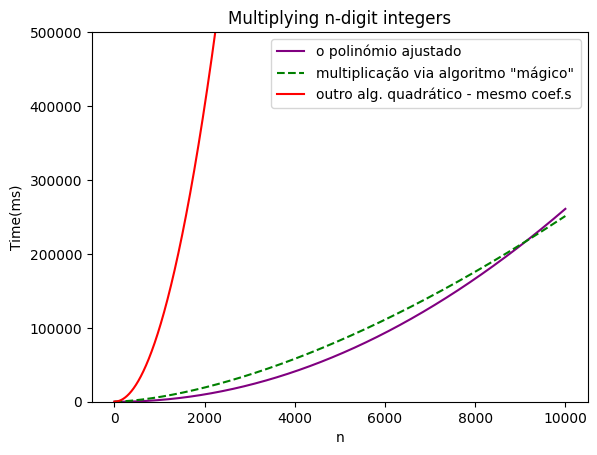

In [9]:

nValsTmp = range(10000)

plt.plot(nValsTmp, [ coeffs[2] + coeffs[1]*n + coeffs[0]*n**2 for n in nValsTmp], color="purple", label="o polinómio ajustado")
plt.plot(nValsTmp, [ n**(1.6)/10 + 100 for n in nValsTmp], "--" , color="green", label="multiplicação via algoritmo \"mágico\"")
plt.plot(nValsTmp, [ n**(2)/10 + 100 for n in nValsTmp], color="red", label="outro alg. quadrático - mesmo coef.s ")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.ylim(0,500000)
plt.xlim()
plt.legend()
plt.title("Multiplying n-digit integers")
print(f'Polinónio ajustado (a roxo): {coeffs[0]:.4f} x^2 + {coeffs[1]:.4f} x + {coeffs[2]:.4f}')

#### Que conclusões podemos tirar da análise do gráfico?

Resposta: _\< a preencher \>_
    
    
___

## *Divide-and-conquer* - Algoritmo recursivo

Este algoritmo "parte" uma multiplicação de inteiros com $n$ dígitos em $4$ multiplicações de tamanho $n/2$,<br> recursivamente, até conseguir calcular o resultado final.

In [10]:
def recursiveMult( X, Y ):
    return recursiveMult_helper( getDigits(X), getDigits(Y) )

def recursiveMult_helper( x, y ):
    n = max( len(x), len(y) ) 
    # preenche o inteiro com menor no. de dígitos colocando (enchendo com) zeros à esquerda até atingir o mesmo tamanho
    while len(x) < n:
        x.insert(0,0)
    while len(y) < n:
        y.insert(0,0)
        
    # caso base -> nos requisitos podemos multiplicar diretamente inteiros com um único dígito    
    if n == 1:
        return x[0]*y[0] 
    
    # caso recursivo -> se n > 1:
    mid = round(n/2)
    
    a = x[:mid]     # ou seja, [ x[0], x[1], ..., x[mid-1] ]
    b = x[mid:]      # ou [ x[mid], ..., x[n-1] ]
    c = y[:mid]   
    d = y[mid:]
    
    ac = recursiveMult_helper( a , c )  # Calcula recursivamente a . c
    ad = recursiveMult_helper( a , d )   # Calcula recursivamente a . d
    bc = recursiveMult_helper( b , c )   # Calcula recursivamente b . c
    bd = recursiveMult_helper( b , d )    # Calcula recursivamente b . d
    
    # agora fazemos uns shifts para acomodar cada uma das 4 partes e poder somá-las (ver slides para a explicação) 
    HH = getDigits(ac) + [ 0 for i in range(2*(n - mid))]     # 10^n . ac
    MID = getDigits(ad + bc) + [0 for i in range(n-mid)]  # 10^{n/2} . (ad + bc) 
    LL = getDigits(bd)                                          # bd
    result = makeInt(HH) + makeInt(MID) + makeInt(LL)
    
    return result

### Verificar se o algoritmo está correto
Um exemplo para verificar se está a funcionar:


In [11]:
X = 1234
Y = 5678
print(recursiveMult(X,Y))
print(X*Y)

7006652
7006652


### Análise empírica do seu tempo de execução

Vamos fazer um pequeno teste:

In [12]:
nValsRec, tValsRec = multInABunch(recursiveMult, nVals, numTrials=5)

Text(0.5, 1.0, 'Multiplicação de inteiros de n-digitos')

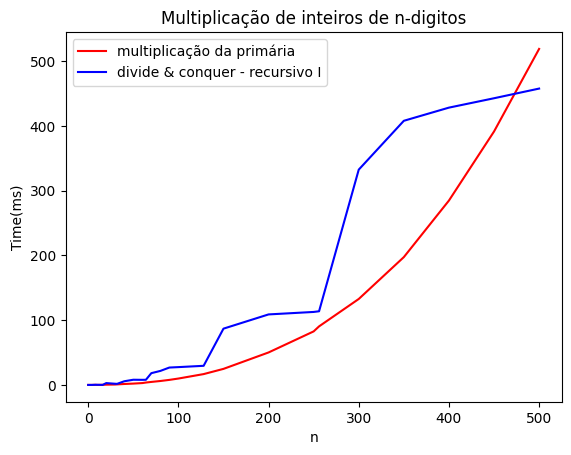

In [13]:
plt.plot(nValsGS, tValsGS, color="red", label="multiplicação da primária")
plt.plot(nValsRec, tValsRec, color="blue", label="divide & conquer - recursivo I")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Multiplicação de inteiros de n-digitos")

Hmm...difícil de tirar conclusões gerais (e já vimos que n=500 pode ser pequeno demais para generalizar)!

(E algo de estranho se passa em alguns dos pontos acima, que por acaso (ou talvez não) acontece nos pontos x = potência de 2 ... ).  

Aqui entra a análise matemática, que nos vai permitir compreender como o algoritmo vai funcionar em termos de quantidades de operações para n a aumentar.

## *Divide-and-conquer* - Algoritmo Karatsuba 

Para os algoritmos anteriores, o número de operações tende a crescer de acordo com uma função quadrática $n^2$.<br>A multiplicação usando o algoritmo de multiplicação de Karatsuba consegue melhorar esta estimativa de quantidade de operações!<br>  Apesar de utilizar também uma estratégia *divide-and-conquer*, diminue de $4$ para $3$ chamadas recursivas de dimensão $n/2$.

Agora é a sua vez de implementar e testar o algoritmo!

In [14]:
def karatsuba(x, y):
    # The base case for recursion
    if len(str(x)) == 1 or len(str(y)) == 1:
        return x * y
    else:
        # calculates the size of the numbers
        n = max(len(str(x)), len(str(y)))
        nby2 = n // 2

        # split the digit sequences in the middle
        a = x // 10**nby2
        b = x % 10**nby2
        c = y // 10**nby2
        d = y % 10**nby2

        # Recursive calls
        ac = karatsuba(a, c)
        bd = karatsuba(b, d)
        z = karatsuba(a + b, c + d)

        return (ac * 10**(2*nby2)) + ((z-ac-bd)*10**nby2) + bd
    
print (karatsuba(3,3))

9


Text(0.5, 1.0, 'Multiplicação de inteiros de n-digitos')

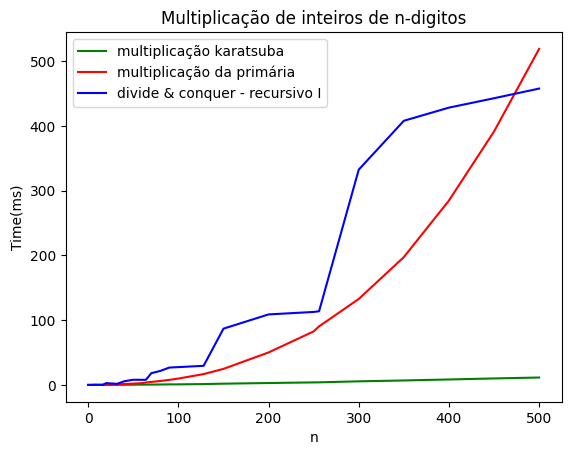

In [15]:
nValsKar, tValsKar = multInABunch(karatsuba, nVals, numTrials=50)

plt.plot(nValsKar, tValsKar, color="green", label="multiplicação karatsuba")
plt.plot(nValsGS, tValsGS, color="red", label="multiplicação da primária")
plt.plot(nValsRec, tValsRec, color="blue", label="divide & conquer - recursivo I")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Multiplicação de inteiros de n-digitos")

In [16]:
def three_sum_brute_force(nums):
    count = 0
    n = len(nums)
    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):
                if nums[i] + nums[j] + nums[k] == 0:
                    count += 1
    return count

In [17]:
def three_sum_binary_search(nums):
    count = 0
    n = len(nums)
    nums.sort()
    for i in range(n):
        for j in range(i+1, n):
            target = -(nums[i] + nums[j])
            left, right = j+1, n-1
            while left <= right:
                mid = (left + right) // 2
                if nums[mid] == target:
                    count += 1
                    break
                elif nums[mid] < target:
                    left = mid + 1
                else:
                    right = mid - 1
    return count


In [18]:
def three_sum_two_pointers(nums):
    count = 0
    n = len(nums)
    nums.sort()
    for i in range(n):
        if i > 0 and nums[i] == nums[i-1]:
            continue
        left, right = i+1, n-1
        while left < right:
            total = nums[i] + nums[left] + nums[right]
            if total < 0:
                left += 1
            elif total > 0:
                right -= 1
            else:
                count += 1
                left += 1
                while left < right and nums[left] == nums[left-1]:
                    left += 1
    return count


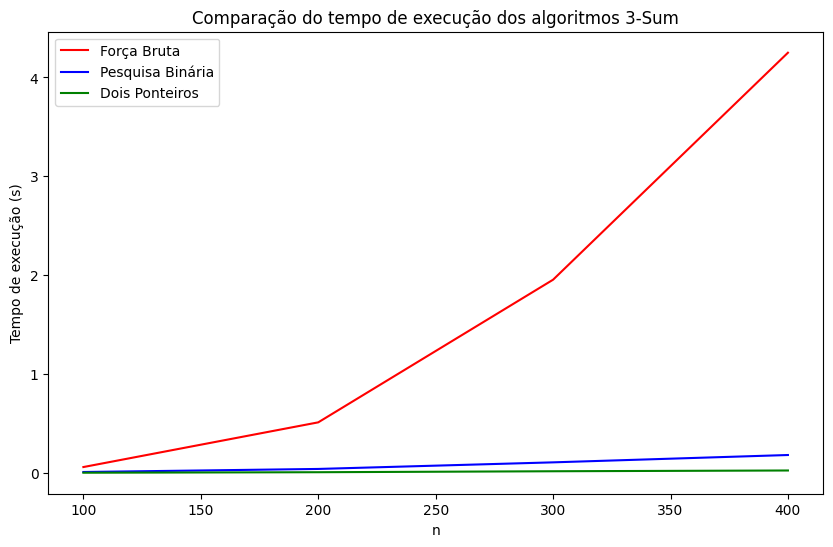

In [19]:
def measure_time(func, nums):
    start = time.time()
    func(nums)
    end = time.time()
    return end - start

# Gere alguns dados de teste
nVals = [i for i in range(100, 500 ,100)]
tValsBF = []
tValsBS = []
tValsTP = []

for n in nVals:
    nums = [i for i in range(-n, n)]
    
    tValsBF.append(measure_time(three_sum_brute_force, nums))
    tValsBS.append(measure_time(three_sum_binary_search, nums))
    tValsTP.append(measure_time(three_sum_two_pointers, nums))

plt.figure(figsize=(10, 6))
plt.plot(nVals, tValsBF, color="red", label="Força Bruta")
plt.plot(nVals, tValsBS, color="blue", label="Pesquisa Binária")
plt.plot(nVals, tValsTP, color="green", label="Dois Ponteiros")
plt.xlabel("n")
plt.ylabel("Tempo de execução (s)")
plt.legend()
plt.title("Comparação do tempo de execução dos algoritmos 3-Sum")
plt.show()